In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [85]:
df = pd.read_csv('../data/dataset2.csv')

In [86]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [87]:
df.isnull().any()

Time                 True
Date                 True
Day of the week      True
CarCount             True
BikeCount            True
BusCount             True
TruckCount           True
Total                True
Traffic Situation    True
dtype: bool

In [88]:
df.dropna(inplace = True)
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
2,12:30:00 AM,10.0,Tuesday,46.0,0.0,3.0,6.0,55.0,low
4,1:00:00 AM,10.0,Tuesday,57.0,6.0,15.0,16.0,94.0,normal
6,1:30:00 AM,10.0,Tuesday,37.0,0.0,1.0,4.0,42.0,low
7,1:45:00 AM,10.0,Tuesday,42.0,4.0,4.0,5.0,55.0,low
9,2:15:00 AM,10.0,Tuesday,34.0,0.0,4.0,7.0,45.0,low
...,...,...,...,...,...,...,...,...,...
2964,9:00:00 PM,9.0,Thursday,107.0,13.0,14.0,28.0,162.0,high
2968,10:00:00 PM,9.0,Thursday,17.0,4.0,1.0,20.0,42.0,normal
2969,10:15:00 PM,9.0,Thursday,11.0,4.0,1.0,30.0,46.0,normal
2972,11:00:00 PM,9.0,Thursday,11.0,0.0,1.0,30.0,42.0,normal


In [89]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trafficStatus = ['low', 'normal', 'heavy', 'high']

df['Time'] = pd.to_datetime(df['Time'], format="%I:%M:%S %p")
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df['Second'] = df['Time'].dt.second
df.drop(columns=['Time'], inplace=True)

df['Day of the week'] = df['Day of the week'].map(lambda x: days.index(x)).astype(int)
df['Traffic Situation'] = df['Traffic Situation'].map(lambda x: trafficStatus.index(x)).astype(int)

df

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour,Minute,Second
2,10.0,1,46.0,0.0,3.0,6.0,55.0,0,0,30,0
4,10.0,1,57.0,6.0,15.0,16.0,94.0,1,1,0,0
6,10.0,1,37.0,0.0,1.0,4.0,42.0,0,1,30,0
7,10.0,1,42.0,4.0,4.0,5.0,55.0,0,1,45,0
9,10.0,1,34.0,0.0,4.0,7.0,45.0,0,2,15,0
...,...,...,...,...,...,...,...,...,...,...,...
2964,9.0,3,107.0,13.0,14.0,28.0,162.0,3,21,0,0
2968,9.0,3,17.0,4.0,1.0,20.0,42.0,1,22,0,0
2969,9.0,3,11.0,4.0,1.0,30.0,46.0,1,22,15,0
2972,9.0,3,11.0,0.0,1.0,30.0,42.0,1,23,0,0


In [90]:
X = df.drop(columns=['Traffic Situation'])
y = df['Traffic Situation']

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y_one_hot = to_categorical(y, num_classes=len(trafficStatus))

X_scaled

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Hour,Minute,Second
0,0.300000,0.166667,0.231214,0.000000,0.06,0.150,0.128906,0.000000,0.666667,0.0
1,0.300000,0.166667,0.294798,0.085714,0.30,0.400,0.281250,0.043478,0.000000,0.0
2,0.300000,0.166667,0.179191,0.000000,0.02,0.100,0.078125,0.043478,0.666667,0.0
3,0.300000,0.166667,0.208092,0.057143,0.08,0.125,0.128906,0.043478,1.000000,0.0
4,0.300000,0.166667,0.161850,0.000000,0.08,0.175,0.089844,0.086957,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...
1124,0.266667,0.500000,0.583815,0.185714,0.28,0.700,0.546875,0.913043,0.000000,0.0
1125,0.266667,0.500000,0.063584,0.057143,0.02,0.500,0.078125,0.956522,0.000000,0.0
1126,0.266667,0.500000,0.028902,0.057143,0.02,0.750,0.093750,0.956522,0.333333,0.0
1127,0.266667,0.500000,0.028902,0.000000,0.02,0.750,0.078125,1.000000,0.000000,0.0


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (790, 10), y_train shape: (790, 4)
X_test shape: (339, 10), y_test shape: (339, 4)


In [92]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

pickle.dump(model, open('NN/NN_model.pkl', 'wb'))

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 948 (3.70 KB)

 Trainable params: 948 (3.70 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5370 - loss: 1.2781 - val_accuracy: 0.5870 - val_loss: 1.1578
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5804 - loss: 1.1310 - val_accuracy: 0.6224 - val_loss: 1.0456
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6477 - loss: 1.0023 - val_accuracy: 0.7109 - val_loss: 0.9679
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6992 - loss: 0.9825 - val_accuracy: 0.7611 - val_loss: 0.8988
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7452 - loss: 0.8683 - val_accuracy: 0.7611 - val_loss: 0.8373
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7672 - loss: 0.7982 - val_accuracy: 0.7640 - val_loss: 0.7888
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7560 - loss: 0.7903 - val_accuracy: 0.7670 - val_loss: 0.7506
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7626 - loss: 0.7540 - val_accuracy: 0.7640 - val_loss:

In [94]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8922 - loss: 0.3483 
Test Accuracy: 0.89


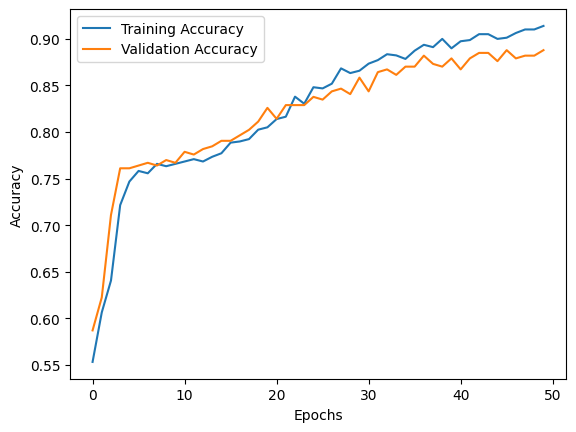

In [95]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()